### ***AI  Based Crop Recommendation and Soil Condition Prediction***

##### ***Pre-Processing Data***

In [8]:
import numpy as np
import pandas as pd

###### *Reading Crops Data of State Jharkhand collected from various platforms*

In [ ]:
crop_data = pd.read_csv("copy 2.csv")

In [10]:
crop_data.head(5)

,pH,N,P,K,Temperature_C,Humidity_%,Rainfall_mm,Crop_Name
0,5.9,281,28,128,21.0,61,379,Wheat
1,4.8,225,26,134,28.0,70,1374,Groundnut
2,6.6,275,38,150,35.6,35,178,Tomato
3,6.2,263,26,168,24.8,81,1418,Maize
4,6.9,348,28,228,24.6,79,1443,Rice


In [11]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pH             1000 non-null   float64
 1   N              1000 non-null   int64  
 2   P              1000 non-null   int64  
 3   K              1000 non-null   int64  
 4   Temperature_C  1000 non-null   float64
 5   Humidity_%     1000 non-null   int64  
 6   Rainfall_mm    1000 non-null   int64  
 7   Crop_Name      1000 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


###### *No need of cleaning already, data is cleaned*

In [12]:
crop_data.describe()

,pH,N,P,K,Temperature_C,Humidity_%,Rainfall_mm
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.257300,234.04000,29.729000,164.187000,23.493200,66.433000,657.233000
std,0.746716,67.62474,6.341433,49.378946,6.498919,15.010224,483.285551
min,4.500000,100.00000,15.000000,80.000000,10.000000,31.000000,9.000000
25%,5.800000,171.00000,25.000000,128.000000,18.475000,53.000000,230.000000
50%,6.300000,249.50000,29.000000,157.000000,24.800000,68.000000,375.500000
75%,6.900000,291.00000,34.000000,196.250000,28.700000,79.000000,1125.750000
max,7.500000,350.00000,45.000000,299.000000,37.800000,90.000000,1497.000000


In [13]:
crops_data_num = crop_data.select_dtypes(include=np.number)

<Axes: >

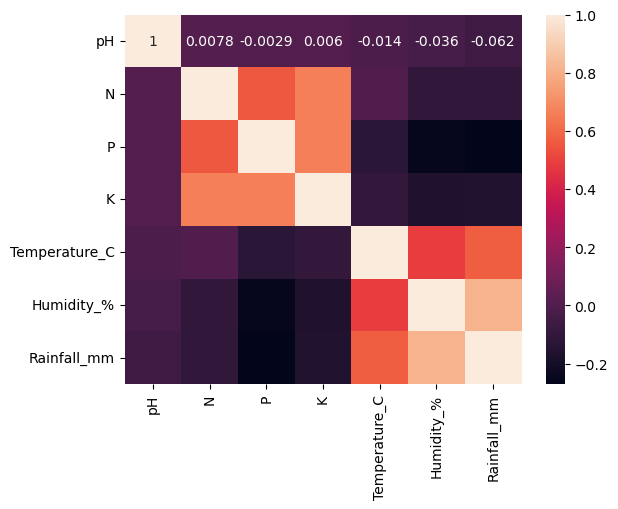

In [14]:
import seaborn as sns
sns.heatmap(crops_data_num.corr(), annot=True)

#### ***Supervised Learning***

##### *Creating Pipelines*

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import RocCurveDisplay,confusion_matrix

In [16]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pH             1000 non-null   float64
 1   N              1000 non-null   int64  
 2   P              1000 non-null   int64  
 3   K              1000 non-null   int64  
 4   Temperature_C  1000 non-null   float64
 5   Humidity_%     1000 non-null   int64  
 6   Rainfall_mm    1000 non-null   int64  
 7   Crop_Name      1000 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


In [17]:
num = ['N', 'P', 'K', 'Temperature_C', 'Humidity_%', 'pH', 'Rainfall_mm']

In [18]:
pipeline1 = Pipeline(
    steps = [
        ("Encoding",OneHotEncoder())
    ]
)

In [19]:
pipeline2 = Pipeline(
    steps = [
        ("Scaling",StandardScaler())
    ]
)

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num",pipeline2,num)
    ]
)

In [21]:
X = crop_data.iloc[:,:-1]
Y = crop_data.iloc[:,-1:]


In [22]:
y = Y[['Crop_Name']].values
Y = y.ravel()

In [23]:
encoder = LabelEncoder()

##### *Data Splitting for Training model*

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.05,random_state=42)

In [25]:
Y_train.reshape(-1,1)

array([['Tomato'],
       ['Gram'],
       ['Wheat'],
       ['Groundnut'],
       ['Wheat'],
       ['Maize'],
       ['Millet'],
       ['Mustard'],
       ['Mustard'],
       ['Millet'],
       ['Wheat'],
       ['Tomato'],
       ['Pulses'],
       ['Millet'],
       ['Wheat'],
       ['Pulses'],
       ['Gram'],
       ['Rice'],
       ['Maize'],
       ['Potato'],
       ['Millet'],
       ['Mustard'],
       ['Potato'],
       ['Rice'],
       ['Pulses'],
       ['Wheat'],
       ['Millet'],
       ['Pulses'],
       ['Groundnut'],
       ['Gram'],
       ['Wheat'],
       ['Wheat'],
       ['Groundnut'],
       ['Pulses'],
       ['Maize'],
       ['Rice'],
       ['Pulses'],
       ['Tomato'],
       ['Groundnut'],
       ['Potato'],
       ['Maize'],
       ['Millet'],
       ['Potato'],
       ['Maize'],
       ['Groundnut'],
       ['Millet'],
       ['Groundnut'],
       ['Potato'],
       ['Wheat'],
       ['Potato'],
       ['Mustard'],
       ['Millet'],
       ['Maize'

In [26]:
Y_train = encoder.fit_transform(Y_train)
Y_test = encoder.transform(Y_test)

##### *Random Forest Classifier*

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf = RandomForestClassifier(n_estimators=100,n_jobs=-1,max_depth=20,random_state=42)

In [29]:
pipeline_rf = Pipeline(
    steps = [
        ("preprocess",preprocessor),
        ("random forest",rf)
    ]
)

In [30]:
pipeline_rf.fit(X_train,Y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Scaling',
                                                                   StandardScaler())]),
                                                  ['N', 'P', 'K',
                                                   'Temperature_C',
                                                   'Humidity_%', 'pH',
                                                   'Rainfall_mm'])])),
                ('random forest',
                 RandomForestClassifier(max_depth=20, n_jobs=-1,
                                        random_state=42))])

In [31]:
pred_rf = pipeline_rf.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [33]:
pred_rf

array([0, 6, 9, 9, 5, 3, 9, 0, 0, 9, 3, 6, 9, 9, 5, 7, 1, 0, 3, 7, 8, 5,
       1, 8, 1, 2, 5, 0, 2, 5, 9, 6, 5, 8, 7, 2, 2, 4, 6, 8, 3, 9, 0, 8,
       6, 5, 4, 5, 4, 0])

In [34]:
acc_rf = accuracy_score(Y_test,pred_rf) * 100
pre_rf = precision_score(Y_test,pred_rf,average='weighted', zero_division=0) * 100
recall_rf = recall_score(Y_test,pred_rf,average='weighted', zero_division=0) * 100
f1_rf = f1_score(Y_test,pred_rf,average='weighted', zero_division=0) * 100

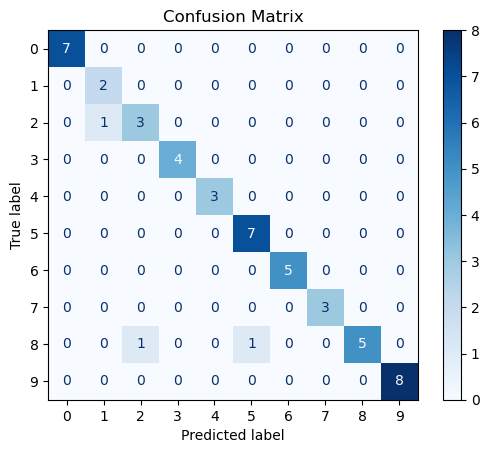

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(pipeline_rf, X_test, Y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [36]:
cm = confusion_matrix(Y_test, pred_rf)

##### *XG BOOST*

In [37]:
import xgboost as xg

In [38]:
xgb = xg.XGBClassifier(n_estimators=200,random_state=42,learning_rate = 0.5,max_depth = 10,objective="multi:softmax")

In [39]:
pipeline_xgb = Pipeline(
    steps = [
        ("preprocess",preprocessor),
        ("XG Boost",xgb)
    ]
)

In [40]:
pipeline_xgb.fit(X_train,Y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Scaling',
                                                                   StandardScaler())]),
                                                  ['N', 'P', 'K',
                                                   'Temperature_C',
                                                   'Humidity_%', 'pH',
                                                   'Rainfall_mm'])])),
                ('XG Boost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_round...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.5,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [41]:
X_test.head(2)

,pH,N,P,K,Temperature_C,Humidity_%,Rainfall_mm
521,6.3,140,30,98,20.7,59,302
737,5.2,146,27,138,24.6,74,817


In [42]:
pred_xgb = pipeline_xgb.predict(X_test)

In [43]:
acc_xgb = accuracy_score(Y_test,pred_xgb) * 100
pre_xgb = precision_score(Y_test,pred_xgb,average='weighted', zero_division=0) * 100
recall_xgb = recall_score(Y_test,pred_xgb,average='weighted', zero_division=0) * 100
f1_xgb = f1_score(Y_test,pred_xgb,average='weighted', zero_division=0) * 100

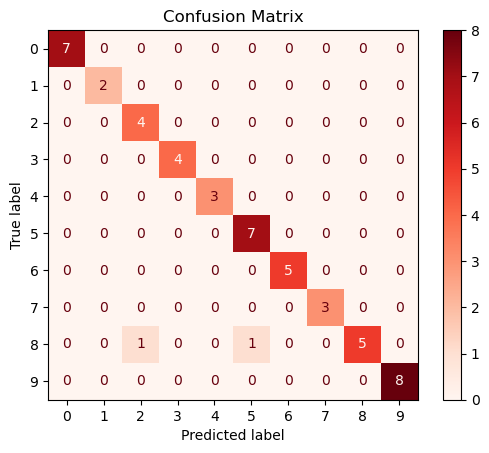

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(pipeline_xgb, X_test, Y_test, cmap='Reds')
plt.title('Confusion Matrix')
plt.show()

##### *LOGISTIC REGRESSION*

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lr = LogisticRegression()

In [47]:
pipeline_lr = Pipeline(
    steps = [
        ("preprocess",preprocessor),
        ("Logistic",lr)
    ]
)

In [48]:
pipeline_lr.fit(X_train,Y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Scaling',
                                                                   StandardScaler())]),
                                                  ['N', 'P', 'K',
                                                   'Temperature_C',
                                                   'Humidity_%', 'pH',
                                                   'Rainfall_mm'])])),
                ('Logistic', LogisticRegression())])

In [49]:
pred_lr = pipeline_lr.predict(X_test)

In [50]:
acc_lr = accuracy_score(Y_test,pred_lr) * 100
pre_lr = precision_score(Y_test,pred_lr,average='weighted', zero_division=0) * 100
recall_lr = recall_score(Y_test,pred_lr,average='weighted', zero_division=0) * 100
f1_lr = f1_score(Y_test,pred_lr,average='weighted', zero_division=0) * 100

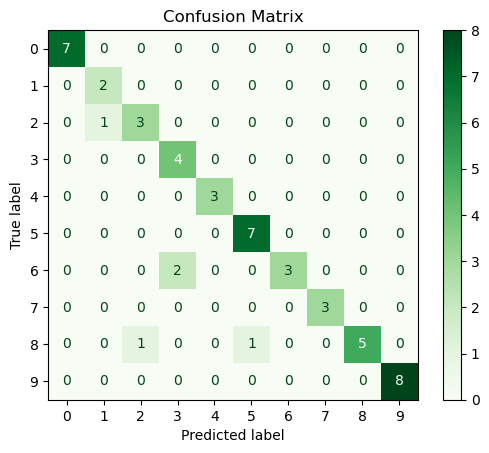

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(pipeline_lr, X_test, Y_test, cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

##### *Models Comparison*

In [52]:
a = {
    "Models" : ["LogisticRegression","RandomForestClassifier","XG Boost"],
    "Accuracy" : [acc_lr,acc_rf,acc_xgb],
    "Precision" : [pre_lr,pre_rf,pre_xgb],
    "Recall" : [recall_lr,recall_rf,recall_xgb],
    "F1 Score": [f1_lr,f1_rf,f1_xgb]
}
models = pd.DataFrame(a)

In [53]:
models

,Models,Accuracy,Precision,Recall,F1 Score
0,LogisticRegression,90.0,92.250000,90.0,89.833333
1,RandomForestClassifier,94.0,94.916667,94.0,93.933333
2,XG Boost,96.0,96.650000,96.0,95.844444


In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


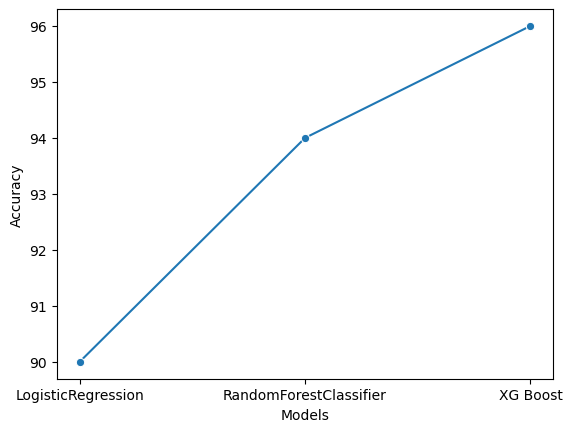

In [55]:
ax = sns.lineplot(x = 'Models',y = 'Accuracy',data = models,marker = 'o')
for x in ax.containers:
    ax.line_plot(x)
plt.show()

#### ***UnSupervised Learning***

##### *Clustering for Soil Condition Based on Conditions provided*

In [56]:
from sklearn.cluster import KMeans

In [57]:
kmeans = KMeans(n_clusters=10,random_state=42,n_init=10)

In [58]:
X

,pH,N,P,K,Temperature_C,Humidity_%,Rainfall_mm
0,5.9,281,28,128,21.0,61,379
1,4.8,225,26,134,28.0,70,1374
2,6.6,275,38,150,35.6,35,178
3,6.2,263,26,168,24.8,81,1418
4,6.9,348,28,228,24.6,79,1443
...,...,...,...,...,...,...,...
995,5.5,153,30,118,18.9,43,302
996,5.7,287,37,263,20.2,44,245
997,6.9,319,28,215,32.0,88,1289
998,7.2,165,26,83,31.8,80,956


In [59]:
new_ct = ColumnTransformer(
    transformers= [
        ("num",StandardScaler(),num),
    ]
)

In [60]:
X_new = preprocessor.fit_transform(X)

In [61]:
kmeans.fit(X_new)

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=10, n_init=10, random_state=42)

In [62]:
labels = kmeans.predict(X_new)

In [63]:
labels

array([2, 9, 7, 1, 6, 5, 3, 2, 1, 2, 0, 2, 3, 5, 2, 2, 1, 0, 7, 7, 8, 4,
       0, 2, 2, 8, 6, 2, 3, 1, 1, 0, 0, 1, 0, 6, 0, 5, 3, 3, 9, 4, 0, 2,
       6, 3, 0, 1, 1, 2, 3, 0, 2, 4, 7, 7, 8, 5, 6, 7, 8, 8, 5, 2, 6, 3,
       2, 3, 5, 4, 0, 7, 9, 3, 4, 5, 9, 4, 8, 6, 4, 9, 3, 8, 2, 8, 0, 3,
       2, 9, 4, 5, 1, 6, 6, 3, 0, 9, 1, 4, 5, 4, 5, 0, 7, 9, 1, 3, 4, 4,
       4, 6, 1, 6, 2, 4, 1, 0, 5, 2, 4, 6, 5, 9, 8, 0, 3, 0, 6, 4, 3, 2,
       2, 0, 7, 2, 0, 9, 0, 3, 6, 1, 4, 3, 4, 5, 5, 8, 2, 2, 4, 7, 8, 8,
       5, 4, 6, 3, 9, 1, 4, 8, 0, 3, 3, 3, 1, 5, 8, 2, 3, 9, 0, 2, 4, 0,
       4, 3, 7, 5, 1, 1, 7, 8, 3, 9, 5, 1, 4, 5, 2, 7, 4, 7, 6, 1, 9, 1,
       7, 4, 2, 6, 0, 3, 8, 8, 9, 0, 7, 3, 1, 6, 2, 9, 1, 3, 4, 1, 7, 9,
       5, 0, 6, 1, 5, 4, 6, 7, 6, 6, 2, 1, 3, 8, 7, 0, 2, 1, 5, 7, 0, 8,
       6, 1, 5, 0, 7, 5, 9, 9, 3, 5, 5, 3, 4, 5, 8, 0, 6, 1, 5, 2, 0, 6,
       6, 3, 5, 5, 3, 0, 8, 2, 8, 0, 9, 1, 5, 4, 3, 0, 1, 5, 3, 3, 8, 4,
       8, 6, 1, 2, 4, 4, 9, 3, 4, 4, 2, 4, 5, 9, 0,

##### *Plotting the clusters*

In [64]:
import seaborn as sns

In [65]:
X_df = X
X_df['labels'] = labels
X_df['labels'] = X_df['labels'].astype(str)

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

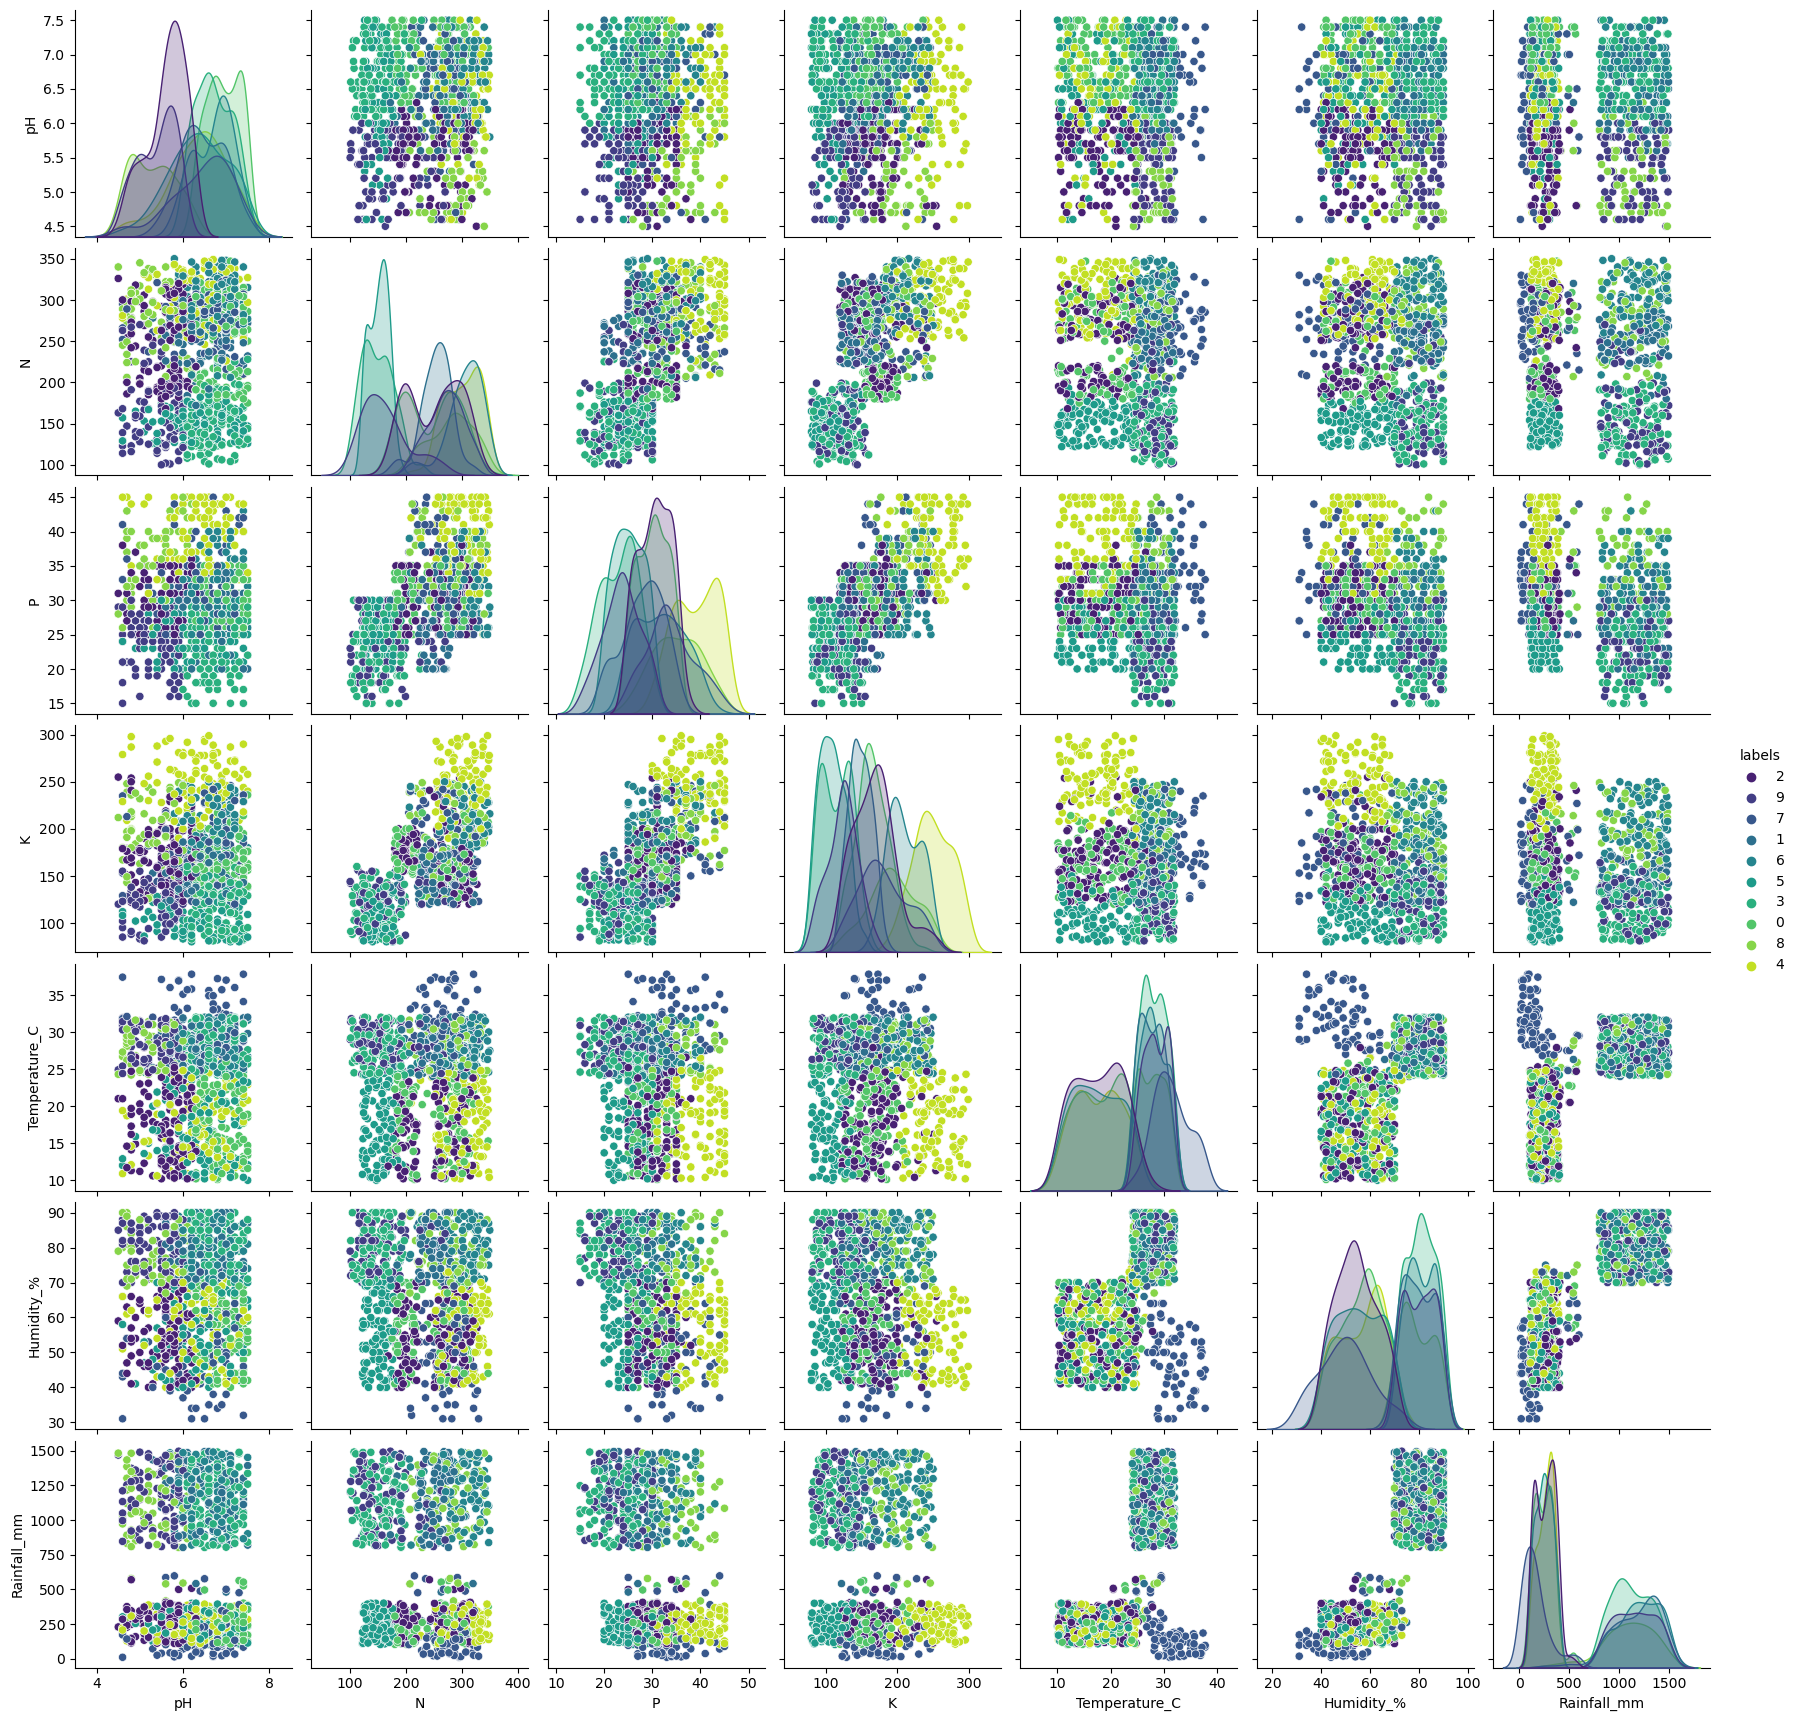

In [66]:
sns.pairplot(X_df,hue='labels',palette='viridis')

##### *Creating lables for Clusters, representing condition, and disease may occur*

In [67]:
X_df

,pH,N,P,K,Temperature_C,Humidity_%,Rainfall_mm,labels
0,5.9,281,28,128,21.0,61,379,2
1,4.8,225,26,134,28.0,70,1374,9
2,6.6,275,38,150,35.6,35,178,7
3,6.2,263,26,168,24.8,81,1418,1
4,6.9,348,28,228,24.6,79,1443,6
...,...,...,...,...,...,...,...,...
995,5.5,153,30,118,18.9,43,302,5
996,5.7,287,37,263,20.2,44,245,4
997,6.9,319,28,215,32.0,88,1289,6
998,7.2,165,26,83,31.8,80,956,3


In [68]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pH             1000 non-null   float64
 1   N              1000 non-null   int64  
 2   P              1000 non-null   int64  
 3   K              1000 non-null   int64  
 4   Temperature_C  1000 non-null   float64
 5   Humidity_%     1000 non-null   int64  
 6   Rainfall_mm    1000 non-null   int64  
 7   labels         1000 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


In [69]:
X_df.groupby('labels')[["pH","N","P","K","Temperature_C","Humidity_%","Rainfall_mm"]].agg(['mean','min','std'])

pH                          N                          P      \
            mean  min       std        mean  min        std       mean min   
labels                                                                       
0       6.931304  6.3  0.377286  246.539130  175  46.655942  30.086957  25   
1       6.470213  5.3  0.506693  253.755319  172  27.789797  28.042553  20   
2       5.619549  4.5  0.446104  250.857143  168  46.646989  30.488722  25   
3       6.709483  6.0  0.411356  149.387931  101  28.665923  22.948276  15   
4       6.345192  4.6  0.672032  300.586538  209  31.621122  39.028846  30   
5       6.361607  4.6  0.676537  150.946429  122  17.179413  25.026786  20   
6       6.702151  5.7  0.449149  304.451613  206  32.464869  31.806452  25   
7       6.424359  4.6  0.697898  271.371795  205  31.400682  33.756410  25   
8       5.308571  4.5  0.502384  280.485714  206  38.612434  35.085714  25   
9       5.387059  4.5  0.437740  163.058824  100  42.122936  23.611765  15   

                           K  ...            Temperature_C                  \
             std        mean  ...        std          mean   min       std   
labels                        ...                                            
0       3.152735  164.591304  ...  22.747622     18.020000  10.1  4.506997   
1       4.260130  147.957447  ...  15.429280     27.714894  24.0  2.248725   
2       3.340787  168.165414  ...  30.038405     17.735338  10.2  4.536973   
3       3.962531  114.732759  ...  21.066090     28.028448  24.1  2.340933   
4       4.440451  249.653846  ...  27.021304     17.664423  10.2  4.348438   
5       3.103209  108.589286  ...  17.945640     17.390179  10.0  4.404338   
6       4.877317  209.870968  ...  22.601571     28.091398  24.1  2.331899   
7       4.946955  179.615385  ...  33.599332     31.414103  24.3  3.335045   
8       4.901177  193.242857  ...  32.809700     27.757143  24.2  2.350737   
9       3.817548  123.470588  ...  20.782655     28.411765  24.3  2.214477   

       Humidity_%                 Rainfall_mm                   
             mean min        std         mean  min         std  
labels                                                          
0       56.452174  40   8.717037   246.852174  102   98.772310  
1       79.893617  66   6.439909  1169.893617  261  242.305169  
2       54.413534  40   8.361281   260.706767  108   99.030664  
3       80.784483  70   5.852990  1126.741379  802  194.783542  
4       56.432692  40   9.279651   259.721154  103   79.587829  
5       55.357143  40   9.256950   245.812500  101   82.829090  
6       80.666667  71   5.701513  1199.408602  819  201.790207  
7       49.961538  31  10.692202   164.974359    9  140.534968  
8       79.142857  67   6.539259  1089.814286  292  256.231852  
9       80.176471  70   6.141538  1155.964706  808  203.056551  

[10 rows x 21 columns]

In [70]:
cluster_labels = {
    '0':"Low-Nutrient Alluvial Soil",
    '1':"High-N/K Mixed Soil",
    '2':"High-N/K Alluvial Soil",
    '3':"Acidic, Low-Nutrient Red Lateritic Soil",
    '4':"Maximum-Nutrient Mixed Soil",
    '5':"Low-Nutrient Clayey-Alluvial Soil",
    '6':"Very Acidic, High-N/K Red Lateritic Soil",
    '7':"High-N/K Mixed Soil (Hot/Dry)",
    '8':"High-N/K Alluvial-Loam Soil",
    '9':"Acidic, High-N/K Red Lateritic Soil"
}

In [71]:
X_df['labels'] = X_df['labels'].map(cluster_labels)

In [72]:
X_df

,pH,N,P,K,Temperature_C,Humidity_%,Rainfall_mm,labels
0,5.9,281,28,128,21.0,61,379,High-N/K Alluvial Soil
1,4.8,225,26,134,28.0,70,1374,"Acidic, High-N/K Red Lateritic Soil"
2,6.6,275,38,150,35.6,35,178,High-N/K Mixed Soil (Hot/Dry)
3,6.2,263,26,168,24.8,81,1418,High-N/K Mixed Soil
4,6.9,348,28,228,24.6,79,1443,"Very Acidic, High-N/K Red Lateritic Soil"
...,...,...,...,...,...,...,...,...
995,5.5,153,30,118,18.9,43,302,Low-Nutrient Clayey-Alluvial Soil
996,5.7,287,37,263,20.2,44,245,Maximum-Nutrient Mixed Soil
997,6.9,319,28,215,32.0,88,1289,"Very Acidic, High-N/K Red Lateritic Soil"
998,7.2,165,26,83,31.8,80,956,"Acidic, Low-Nutrient Red Lateritic Soil"


#### ***Crop and Soil condition recommendation***

In [76]:
crop_data['Crop_Name'] = crop_data['Crop_Name']+" & "+X_df['labels']

In [77]:
crop_data.rename(columns = {'Crop_Name':'Crop_Name & Soil_Condition'})

,pH,N,P,K,Temperature_C,Humidity_%,Rainfall_mm,Crop_Name & Soil_Condition
0,5.9,281,28,128,21.0,61,379,Wheat & High-N/K Alluvial Soil & High-N/K Allu...
1,4.8,225,26,134,28.0,70,1374,"Groundnut & Acidic, High-N/K Red Lateritic Soi..."
2,6.6,275,38,150,35.6,35,178,Tomato & High-N/K Mixed Soil (Hot/Dry) & High-...
3,6.2,263,26,168,24.8,81,1418,Maize & High-N/K Mixed Soil & High-N/K Mixed Soil
4,6.9,348,28,228,24.6,79,1443,"Rice & Very Acidic, High-N/K Red Lateritic Soi..."
...,...,...,...,...,...,...,...,...
995,5.5,153,30,118,18.9,43,302,Gram & Low-Nutrient Clayey-Alluvial Soil & Low...
996,5.7,287,37,263,20.2,44,245,Potato & Maximum-Nutrient Mixed Soil & Maximum...
997,6.9,319,28,215,32.0,88,1289,"Rice & Very Acidic, High-N/K Red Lateritic Soi..."
998,7.2,165,26,83,31.8,80,956,"Pulses & Acidic, Low-Nutrient Red Lateritic So..."


In [78]:
crop_data.head(5)

,pH,N,P,K,Temperature_C,Humidity_%,Rainfall_mm,Crop_Name
0,5.9,281,28,128,21.0,61,379,Wheat & High-N/K Alluvial Soil & High-N/K Allu...
1,4.8,225,26,134,28.0,70,1374,"Groundnut & Acidic, High-N/K Red Lateritic Soi..."
2,6.6,275,38,150,35.6,35,178,Tomato & High-N/K Mixed Soil (Hot/Dry) & High-...
3,6.2,263,26,168,24.8,81,1418,Maize & High-N/K Mixed Soil & High-N/K Mixed Soil
4,6.9,348,28,228,24.6,79,1443,"Rice & Very Acidic, High-N/K Red Lateritic Soi..."


#### ***Supervised Learning for predicting the Soil Condition and Disease occur***

##### *Creating Pipelines*

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder,MinMaxScaler, MultiLabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [80]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pH             1000 non-null   float64
 1   N              1000 non-null   int64  
 2   P              1000 non-null   int64  
 3   K              1000 non-null   int64  
 4   Temperature_C  1000 non-null   float64
 5   Humidity_%     1000 non-null   int64  
 6   Rainfall_mm    1000 non-null   int64  
 7   labels         1000 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


In [81]:
X1 = X_df.iloc[:,:-1]
Y1 = X_df.iloc[:,-1:]

In [82]:
len(Y1)

1000

In [83]:
Y1.ndim

2

In [84]:
encoder1 = LabelEncoder()

In [85]:
X1.count

<bound method DataFrame.count of       pH    N   P    K  Temperature_C  Humidity_%  Rainfall_mm
0    5.9  281  28  128           21.0          61          379
1    4.8  225  26  134           28.0          70         1374
2    6.6  275  38  150           35.6          35          178
3    6.2  263  26  168           24.8          81         1418
4    6.9  348  28  228           24.6          79         1443
..   ...  ...  ..  ...            ...         ...          ...
995  5.5  153  30  118           18.9          43          302
996  5.7  287  37  263           20.2          44          245
997  6.9  319  28  215           32.0          88         1289
998  7.2  165  26   83           31.8          80          956
999  6.6  164  20  139           30.9          75         1299

[1000 rows x 7 columns]>

In [86]:
len(Y1)

1000

##### *Splitting Data*

In [87]:
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X1,Y1,test_size=0.1,random_state=42)

##### *Random Forest Classifier*

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

In [89]:
rf1 = RandomForestClassifier(n_estimators=100,n_jobs=-1,max_depth=20,random_state=42)

In [90]:
pipeline_rf1 = Pipeline(
    steps = [
        ("preprocess",preprocessor),
        ("random forest",rf1)
    ]
)

In [91]:
Y1_train

,labels
716,High-N/K Alluvial Soil
351,"Acidic, High-N/K Red Lateritic Soil"
936,High-N/K Mixed Soil (Hot/Dry)
256,High-N/K Alluvial-Loam Soil
635,Low-Nutrient Alluvial Soil
...,...
106,High-N/K Mixed Soil
270,High-N/K Alluvial-Loam Soil
860,High-N/K Mixed Soil
435,Maximum-Nutrient Mixed Soil


In [92]:
Y1_train.shape

(900, 1)

In [93]:
Y1_train = encoder1.fit_transform(Y1_train)
Y1_test = encoder1.transform(Y1_test)

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [94]:
Y1_train

array([2, 0, 5, 3, 6, 6, 0, 4, 3, 8, 8, 8, 8, 1, 6, 6, 1, 9, 3, 8, 1, 6,
       8, 7, 4, 6, 3, 2, 9, 2, 2, 5, 1, 7, 9, 5, 8, 1, 3, 0, 9, 7, 2, 7,
       6, 5, 5, 7, 2, 5, 2, 0, 6, 5, 7, 9, 4, 4, 3, 0, 2, 9, 6, 8, 1, 2,
       7, 7, 2, 9, 0, 3, 8, 8, 3, 7, 8, 4, 8, 9, 3, 1, 5, 6, 2, 0, 2, 1,
       8, 4, 3, 6, 2, 8, 0, 2, 5, 5, 3, 3, 4, 6, 6, 1, 7, 1, 1, 0, 9, 0,
       1, 4, 0, 8, 6, 2, 0, 0, 7, 9, 7, 2, 1, 2, 0, 5, 6, 7, 7, 8, 2, 0,
       6, 5, 4, 6, 4, 1, 8, 7, 4, 3, 4, 0, 8, 8, 1, 8, 2, 3, 1, 6, 8, 1,
       0, 4, 5, 4, 2, 7, 5, 7, 0, 7, 6, 9, 4, 8, 1, 7, 6, 7, 1, 1, 6, 2,
       0, 7, 0, 7, 1, 8, 5, 8, 9, 5, 6, 2, 5, 9, 9, 1, 5, 7, 2, 2, 1, 0,
       2, 8, 6, 5, 9, 6, 1, 3, 3, 3, 4, 0, 5, 4, 5, 1, 5, 9, 9, 1, 8, 2,
       9, 2, 5, 3, 0, 0, 7, 2, 0, 6, 7, 2, 7, 1, 2, 4, 6, 1, 0, 0, 7, 8,
       6, 6, 1, 6, 0, 3, 8, 2, 4, 0, 6, 8, 8, 2, 6, 0, 9, 8, 3, 9, 2, 1,
       1, 1, 4, 5, 2, 8, 2, 9, 9, 2, 1, 6, 6, 1, 1, 1, 7, 7, 2, 5, 7, 1,
       9, 2, 9, 2, 0, 8, 3, 8, 1, 3, 3, 8, 2, 9, 2,

In [95]:
Y1_train.shape

(900,)

In [96]:
pipeline_rf1.fit(X1_train,Y1_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Scaling',
                                                                   StandardScaler())]),
                                                  ['N', 'P', 'K',
                                                   'Temperature_C',
                                                   'Humidity_%', 'pH',
                                                   'Rainfall_mm'])])),
                ('random forest',
                 RandomForestClassifier(max_depth=20, n_jobs=-1,
                                        random_state=42))])

In [97]:
pred_rf1 = pipeline_rf1.predict(X1_test)

In [98]:
acc_rf1 = accuracy_score(Y1_test,pred_rf1) * 100
pre_rf1 = precision_score(Y1_test,pred_rf1,average='weighted', zero_division=0) * 100
recall_rf1 = recall_score(Y1_test,pred_rf1,average='weighted', zero_division=0) * 100
f1_rf1 = f1_score(Y1_test,pred_rf1,average='weighted', zero_division=0) * 100

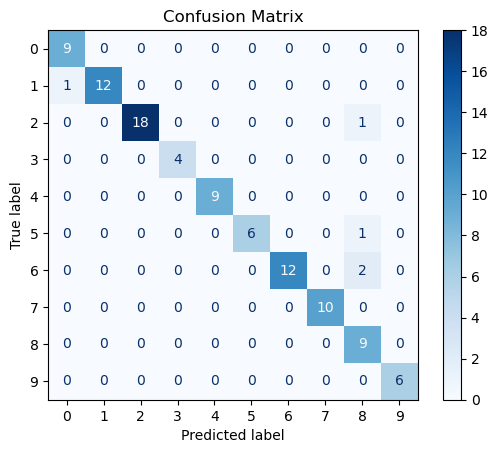

In [99]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(pipeline_rf1, X1_test, Y1_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

##### *XG Boost*

In [100]:
pipeline_xgb1 = Pipeline(
    steps = [
        ("preprocess",preprocessor),
        ("XG Boost",xgb)
    ]
)

In [101]:
pipeline_xgb1.fit(X1_train,Y1_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Scaling',
                                                                   StandardScaler())]),
                                                  ['N', 'P', 'K',
                                                   'Temperature_C',
                                                   'Humidity_%', 'pH',
                                                   'Rainfall_mm'])])),
                ('XG Boost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_round...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.5,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [102]:
pred_xgb1 = pipeline_xgb1.predict(X1_test)

In [103]:
acc_xgb1 = accuracy_score(Y1_test,pred_xgb1) * 100
pre_xgb1 = precision_score(Y1_test,pred_xgb1,average='weighted', zero_division=0) * 100
recall_xgb1 = recall_score(Y1_test,pred_xgb1,average='weighted', zero_division=0) * 100
f1_xgb1 = f1_score(Y1_test,pred_xgb1,average='weighted', zero_division=0) * 100

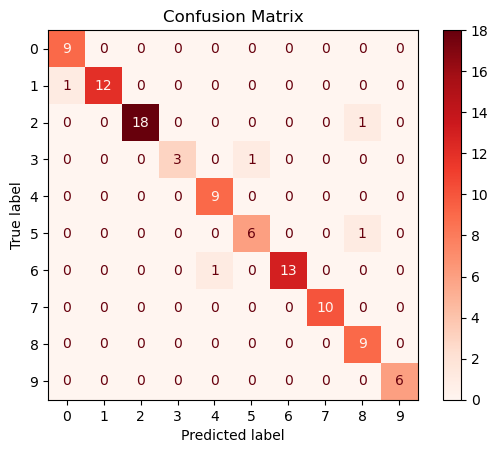

In [104]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(pipeline_xgb1, X1_test, Y1_test, cmap='Reds')
plt.title('Confusion Matrix')
plt.show()

##### *Logistic Regression*

In [105]:
pipeline_lr1 = Pipeline(
    steps = [
        ("preprocess",preprocessor),
        ("Logistic",lr)
    ]
)

In [106]:
pipeline_lr1.fit(X1_train,Y1_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Scaling',
                                                                   StandardScaler())]),
                                                  ['N', 'P', 'K',
                                                   'Temperature_C',
                                                   'Humidity_%', 'pH',
                                                   'Rainfall_mm'])])),
                ('Logistic', LogisticRegression())])

In [107]:
pred_lr1 = pipeline_lr1.predict(X1_test)

In [108]:
acc_lr1 = accuracy_score(Y1_test,pred_lr1) * 100
pre_lr1 = precision_score(Y1_test,pred_lr1,average='weighted', zero_division=0) * 100
recall_lr1 = recall_score(Y1_test,pred_lr1,average='weighted', zero_division=0) * 100
f1_lr1 = f1_score(Y1_test,pred_lr1,average='weighted', zero_division=0) * 100

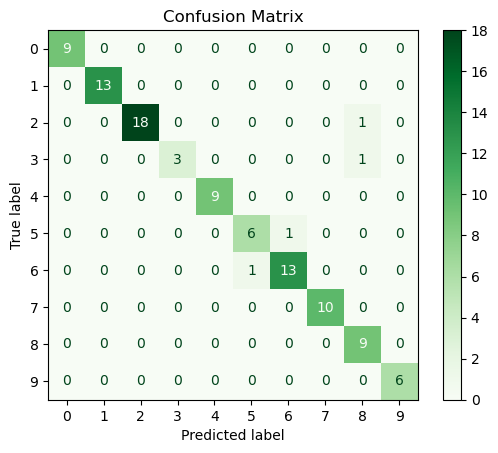

In [109]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(pipeline_lr1, X1_test, Y1_test, cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

##### *Soil Condition Recommendation*

In [110]:
crop_lr1 = encoder1.inverse_transform(pred_lr1)
crop_rf1 = encoder1.inverse_transform(pred_rf1)
crop_xgb1 = encoder1.inverse_transform(pred_xgb1)
if acc_lr1 > acc_rf1:
    if acc_lr1 > acc_xgb1:
        print(f"Logistic Regression model with accuracy {acc_lr1 * 100}")
        print(f"Predicted Crop Recommendation{crop_lr1}")
    else:
        print(f"XG Boost model with accuracy {acc_xgb1 * 100}")
        print(f"Predicted Crop Recommendation{crop_xgb1}")
else:
    if acc_rf1 > acc_xgb1:
        print(f"Random Forest model with accuracy {acc_rf1 * 100}")
        print(f"Predicted Crop Recommendation{crop_rf1}")
    else:
        print(f"XG Boost model with accuracy {acc_xgb1 * 100}")
        print(f"Predicted Crop Recommendation{crop_xgb1}")

Logistic Regression model with accuracy 9600.0
Predicted Crop Recommendation['Low-Nutrient Clayey-Alluvial Soil' 'Acidic, High-N/K Red Lateritic Soil'
 'High-N/K Alluvial Soil' 'Low-Nutrient Alluvial Soil'
 'High-N/K Alluvial Soil' 'Acidic, Low-Nutrient Red Lateritic Soil'
 'High-N/K Alluvial Soil' 'Low-Nutrient Clayey-Alluvial Soil'
 'Low-Nutrient Clayey-Alluvial Soil' 'Low-Nutrient Alluvial Soil'
 'Acidic, Low-Nutrient Red Lateritic Soil'
 'Acidic, High-N/K Red Lateritic Soil' 'High-N/K Alluvial Soil'
 'Low-Nutrient Alluvial Soil' 'Maximum-Nutrient Mixed Soil'
 'Very Acidic, High-N/K Red Lateritic Soil' 'High-N/K Mixed Soil'
 'Low-Nutrient Clayey-Alluvial Soil'
 'Acidic, Low-Nutrient Red Lateritic Soil'
 'Very Acidic, High-N/K Red Lateritic Soil'
 'High-N/K Mixed Soil (Hot/Dry)' 'Maximum-Nutrient Mixed Soil'
 'High-N/K Mixed Soil' 'Very Acidic, High-N/K Red Lateritic Soil'
 'High-N/K Mixed Soil' 'High-N/K Mixed Soil (Hot/Dry)'
 'Maximum-Nutrient Mixed Soil' 'Low-Nutrient Clayey-Alluv

##### *Model Comparison*

In [111]:
a1 = {
    "Models" : ["LogisticRegression","RandomForestClassifier","XG Boost"],
    "Accuracy" : [acc_lr1,acc_rf1,acc_xgb1],
    "Precision" : [pre_lr1,pre_rf1,pre_xgb1],
    "Recall" : [recall_lr1,recall_rf1,recall_xgb1],
    "F1 Score": [f1_lr1,f1_rf1,f1_xgb1]
}
models1 = pd.DataFrame(a1)

In [112]:
models1

,Models,Accuracy,Precision,Recall,F1 Score
0,LogisticRegression,96.0,96.363636,96.0,96.015058
1,RandomForestClassifier,95.0,96.330769,95.0,95.241054
2,XG Boost,95.0,95.563636,95.0,95.029171


c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


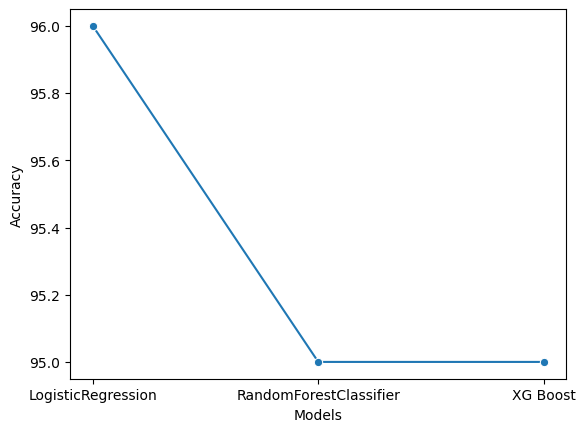

In [113]:
ax = sns.lineplot(x = 'Models',y = 'Accuracy',data = models1,marker = 'o')
for x in ax.containers:
    ax.line_plot(x)
plt.show()

#### ***Crop Recommendation and Soil Condition Prediction***

In [114]:
crop_data.columns

Index(['pH', 'N', 'P', 'K', 'Temperature_C', 'Humidity_%', 'Rainfall_mm',
       'Crop_Name'],
      dtype='object')

In [115]:
print(f"pH value between {crop_data['pH'].min()} and {crop_data['pH'].max()}")
print(f"N value between {crop_data['N'].min()} and {crop_data['N'].max()}")
print(f"P value between {crop_data['P'].min()} and {crop_data['P'].max()}")
print(f"K value between {crop_data['K'].min()} and {crop_data['K'].max()}")
print(f"Humidity value between {crop_data['Humidity_%'].min()} and {crop_data['Humidity_%'].max()}")
print(f"Temperature_C value between {crop_data['Temperature_C'].min()} and {crop_data['Temperature_C'].max()}")
print(f"Rainfall_mm value between {crop_data['Rainfall_mm'].min()} and {crop_data['Rainfall_mm'].max()}")

pH value between 4.5 and 7.5
N value between 100 and 350
P value between 15 and 45
K value between 80 and 299
Humidity value between 31 and 90
Temperature_C value between 10.0 and 37.8
Rainfall_mm value between 9 and 1497


In [116]:
eg = {
    "pH":[5.0],
    "N":[250],
    "P":[30],
    "K":[170],
    "Temperature_C":[28.0],
    "Humidity_%":[70],
    "Rainfall_mm":[800]
}
eg_df = pd.DataFrame(eg)

In [117]:
eg_df

,pH,N,P,K,Temperature_C,Humidity_%,Rainfall_mm
0,5.0,250,30,170,28.0,70,800


In [118]:
pred_eg = pipeline_rf.predict(eg_df)

In [119]:
pred_label = encoder.inverse_transform(pred_eg)

In [120]:
pred_eg1 = pipeline_rf1.predict(eg_df)

In [121]:
pred_label1 = encoder1.inverse_transform(pred_eg1)

In [122]:
print(f"Predicted Crop : {pred_label}\nSoil Condition: {pred_label1}")

Predicted Crop : ['Groundnut']
Soil Condition: ['High-N/K Alluvial-Loam Soil']
